In [3]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

import numpy as np
from matplotlib import pyplot as plt
import glob
import os

import cdf

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\upar-uperp-multi-collapse
Populating the interactive namespace from numpy and matplotlib
Total # of packings: 

`%matplotlib` prevents importing * from pylab and numpy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute


 83006
After (1.1):  68835
After (1.2):  62274
After (1.3):  61146
After (2.1):  60226
After (2.2):  59838
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59722


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\upar-uperp-multi-collapse
Populating the interactive namespace from numpy and matplotlib
Total # of packings: 

`%matplotlib` prevents importing * from pylab and numpy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute


 83006
After (1.1):  68835
After (1.2):  62274
After (1.3):  61146
After (2.1):  60226
After (2.2):  59838
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59722


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


In [2]:
def get_scale(values):
    return np.std(values)

\includegraphics{notebooks/upar-uperp-multi-collapse/upar.pdf}


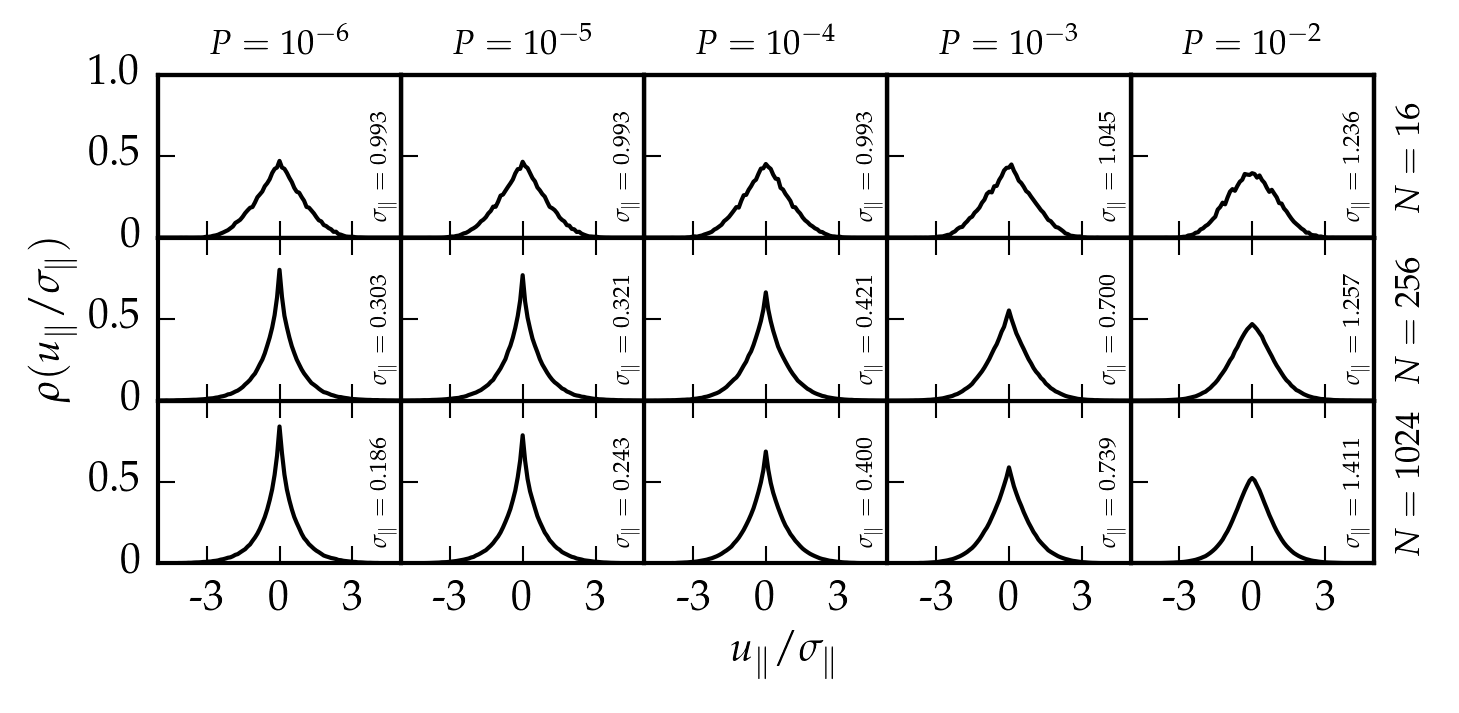

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

allfiles = glob.glob("E:/PhD rearrangements/upps_in_contact/*.npz")
bins = np.linspace(-5,5,100)


fig = fullfig()
plt.subplot(3,6,1)
plt.subplots_adjust(wspace=0, hspace=0, top=0.87, right=0.95)

i = 0

for fn in sorted(allfiles):
    if ('N16' not in fn and 'N256' not in fn and 'N1024' not in fn) or "P1e-" not in fn:
        continue

    name = os.path.split(fn)[1].split(".")[0]
    
    allpar = np.load(fn)["allpar"]

    if len(allpar) < 20:
        continue

    try:
        N = int(fn.split("N")[1].split("~")[0])
        P = fn.split("~P")[1].split(".")[0]
        P = float(P[0] + "." + P[1:])
    except ValueError:
        continue
    
    if P < 1e-6:
        continue   
        
    row = {16:0, 256: 1, 1024: 2}[N]
    col = (np.rint(np.log10(P)))+6
    
    plt.subplot(3,5,col + row*5 + 1)
    
    ax = plt.gca() 
    ax.set_xticks([-3,0,3])
    ax.set_xlim(-5, 5)
    ax.set_ylim(0,1)
    ax.set_yticks([0,0.5,1])
    
    ax.yaxis.set_ticks_position('left')

    if row == 0:
        ax2 = ax.twiny()
        ax2.set_xticks([])
        ax2.set_xlabel("$P=10^{%i}$" % np.log10(P), fontsize='small')
    
    if row == 2:
        ax.set_xticklabels(["-3", "0", "3"])
    else:
        ax.set_xticklabels([])
        
    if col == 0:
        if row == 1:
            ax.set_ylabel(r"$\rho(u_\parallel / \sigma_\parallel)$", labelpad=2)
        ax.set_yticklabels(["0", "0.5", "" if row > 0 else "1.0"])
    else:
        ax.set_yticklabels([])
    
    if col == 4:
        ax2 = ax.twinx()
        ax2.set_yticks([])
        ax2.set_ylabel("$N = %i$" % N, fontsize='small')

    scale = get_scale(allpar)
    
    color = "black" #plt.get_cmap("viridis")((np.log10(P) + 7) / 8)
    dens, bins = np.histogram(
        allpar/scale,
        bins=bins,
        density=True
    )

    ax.text(3.8,0.1,"$\sigma_\parallel = %.3f$" % scale, fontsize='xx-small', rotation=90, va='bottom')
    ax.plot(0.5*(bins[1:] + bins[:-1]), dens, label="$10^{%i}$" % np.log10(P), color=color)
    
fig.text(0.55, 0.04, r"$u_\parallel / \sigma_\parallel$", ha='center')

plt.savefig("upar.pdf")

[]

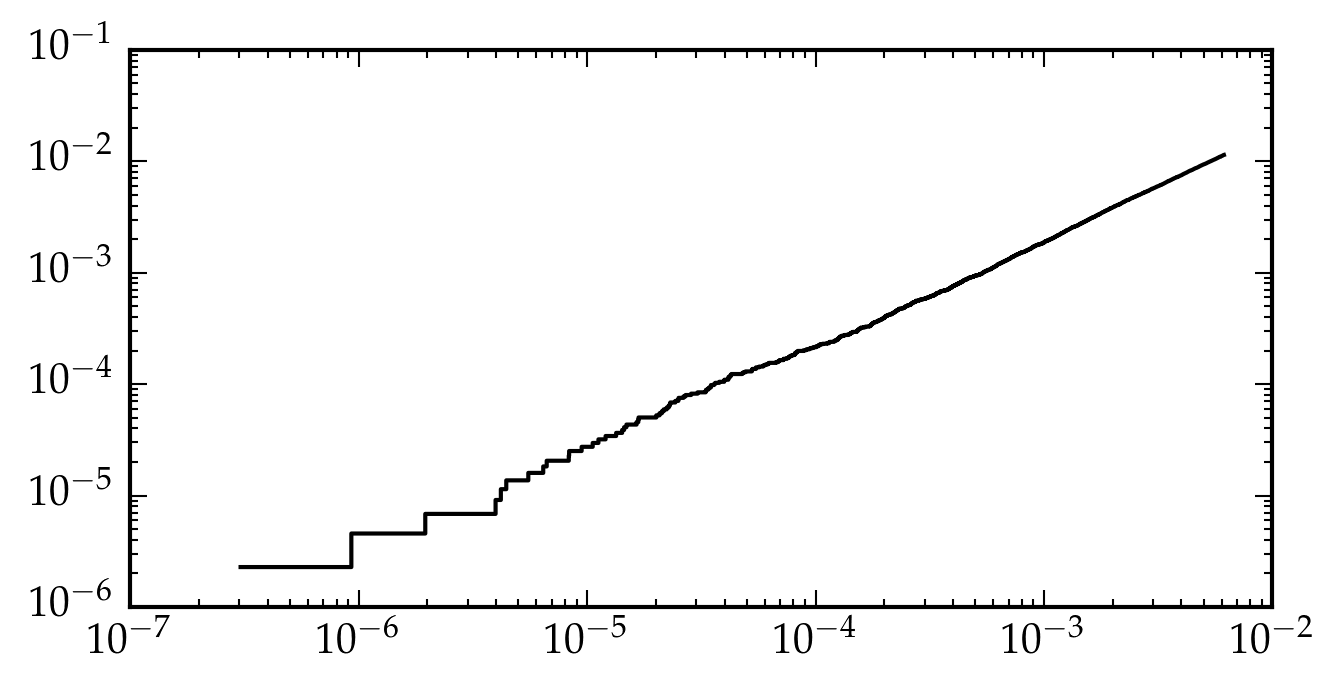

In [8]:
plt.plot(x[:10000],y[:10000],label="$10^{%i}$" % np.log10(P), color=color)
plt.loglog()

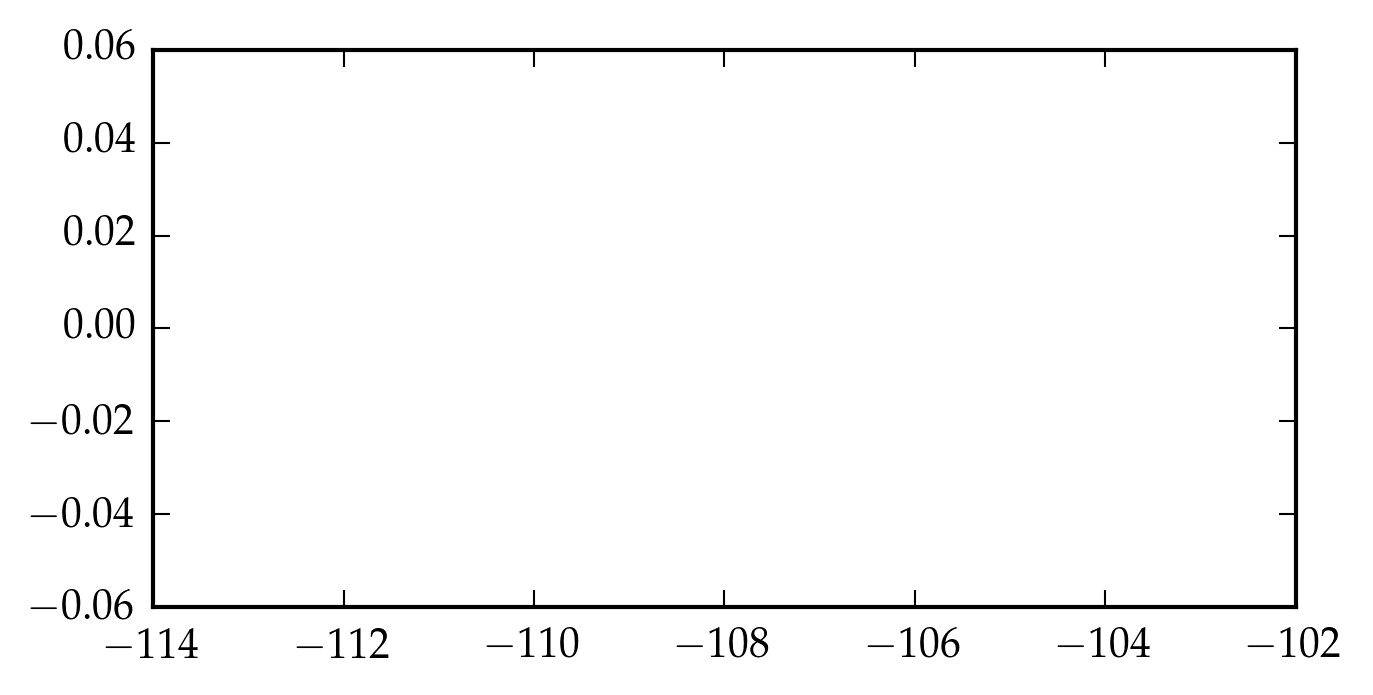

In [9]:
plt.plot(x[msk],y[msk],label="$10^{%i}$" % np.log10(P), color=color)

\includegraphics{notebooks/upar-uperp-multi-collapse/uperp.pdf}


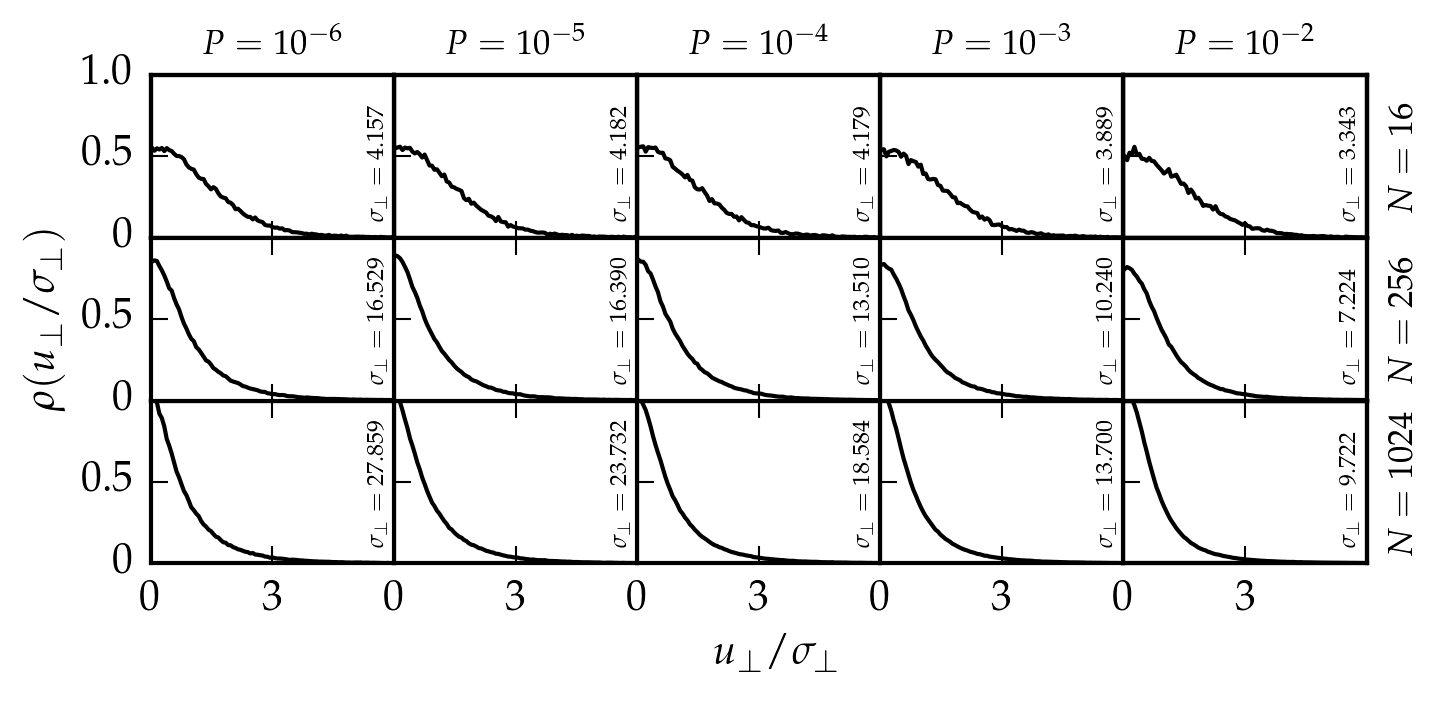

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

allfiles = glob.glob("E:/PhD rearrangements/upps_in_contact/*.npz")
bins = np.linspace(0,6,100)


fig = fullfig()
plt.subplot(3,6,1)
plt.subplots_adjust(wspace=0, hspace=0, top=0.87, right=0.95)

i = 0

for fn in sorted(allfiles):
    if ('N16' not in fn and 'N256' not in fn and 'N1024' not in fn) or "P1e-" not in fn:
        continue

    name = os.path.split(fn)[1].split(".")[0]
    
    allperp = np.load(fn)["allperp"]

    if len(allperp) < 20:
        continue

    try:
        N = int(fn.split("N")[1].split("~")[0])
        P = fn.split("~P")[1].split(".")[0]
        P = float(P[0] + "." + P[1:])
    except ValueError:
        continue
    
    if P < 1e-6:
        continue   
        
    row = {16:0, 256: 1, 1024: 2}[N]
    col = (np.rint(np.log10(P)))+6
    
    plt.subplot(3,5,col + row*5 + 1)
    
    ax = plt.gca() 
    ax.set_xticks([0,3,6])
    ax.set_xlim(0, 6)
    ax.set_ylim(0,1)
    ax.set_yticks([0,0.5,1])
    ax.yaxis.set_ticks_position('left')

    if row == 0:
        ax2 = ax.twiny()
        ax2.set_xticks([])
        ax2.set_xlabel("$P=10^{%i}$" % np.log10(P), fontsize='small')
    
    if row == 2:
        ax.set_xticklabels(["0", "3", "" if col < 5 else "6"])
    else:
        ax.set_xticklabels([])
        
    if col == 0:
        if row == 1:
            ax.set_ylabel(r"$\rho(u_\perp / \sigma_\perp)$", labelpad=2)
        ax.set_yticklabels(["0", "0.5", "" if row > 0 else "1.0"])
    else:
        ax.set_yticklabels([])
    
    if col == 4:
        ax2 = ax.twinx()
        ax2.set_yticks([])
        ax2.set_ylabel("$N = %i$" % N, fontsize='small')

    scale = get_scale(allperp)
    
    #color = plt.get_cmap("viridis")((np.log10(P) + 7) / 8)
    color = "black"
    dens, bins = np.histogram(
        allperp/scale,
        bins=bins,
        density=True
    )

    ax.text(5.4,0.1,"$\sigma_\perp = %.3f$" % scale, fontsize='xx-small', rotation=90, va='bottom')
    ax.plot(0.5*(bins[1:] + bins[:-1]), dens, label="$10^{%i}$" % np.log10(P), color=color)
    
fig.text(0.55, 0.04, r"$u_\perp / \sigma_\perp$", ha='center')

plt.savefig("uperp.pdf")